# Code for Producing Figure 5

### From the paper:  
**"Fractal clusters and urban scaling shape spatial inequality in U.S. patenting"**, published in npj Complexity,  https://doi.org/10.1038/s44260-025-00054-y

**Authors:**  
Salva Duran-Nebreda, Blai Vidiella,  R. Alexander Bentley and Sergi Valverde

**Date:** September 8, 2025  
**Location:** Barcelona  
**Group:** Evolution of Networks Lab |  https://svalver.github.io  
**E-mail:** svalver@gmail.com

/var/folders/0p/7lmr8bnx25z86qtgtdv9h4br0000gn/T/ipykernel_31880/1739696141.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=['x', 'y'])
/var/folders/0p/7lmr8bnx25z86qtgtdv9h4br0000gn/T/ipykernel_31880/1739696141.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=['x', 'y'])
/var/folders/0p/7lmr8bnx25z86qtgtdv9h4br0000gn/T/ipykernel_31880/1739696141.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=['x', 'y'])
/var/folders/0p/7lmr8bnx25z86qtgtdv9h4br0000gn/T/ipykernel_31880/17

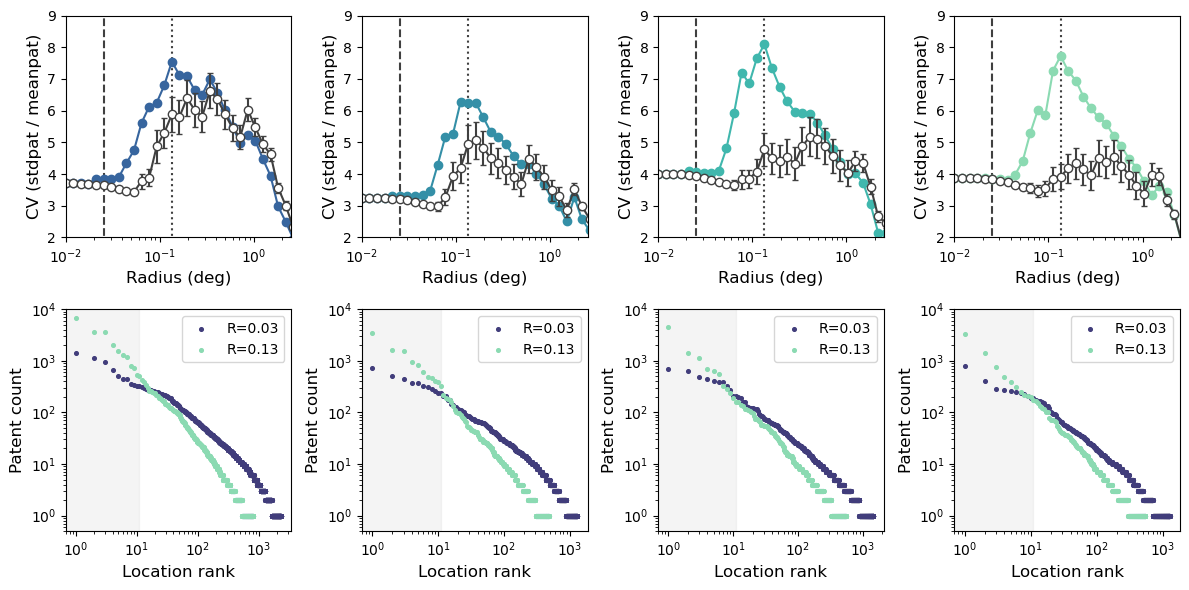

In [4]:
import networkx as nx
import powerlaw
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

def plot_zipf(ax, file_path, color, label, marker):
    data = pd.read_csv(file_path, delim_whitespace=True, header=None, names=['x', 'y'])
    ax.scatter(data['x'], data['y'], marker=marker, s=7, color=color, label=label)
    ax.set_xlabel('Location rank', fontsize=12)
    ax.set_ylabel('Patent count', fontsize=12)
    ax.loglog()
    return ax

plt.subplots(2,4,figsize=(12, 6))
datasets = ['biotech','apps', 'machine learning', 'videogames']
colors = sns.color_palette('mako', 6)
bs_color =(0.25,0.25,0.25)


for dataset in datasets:
    index = datasets.index(dataset)
    file_path = 'table_'+dataset+'.csv'
    df = pd.read_csv(file_path)

    file_path_rep = 'table_'+dataset+'_100.csv'
    df_rep = pd.read_csv(file_path_rep)

    # Compute the coefficient of variation (cv) versus scale in the empirical system
    cv = df['stdpat'] / df['meanpat']

    # Compute CV for each row
    df_rep['cv'] = df_rep['stdpat'] / df_rep['meanpat']

    # Group by scale and compute the mean and standard deviation of CV across replicas
    cv_stats = df_rep.groupby('scale')['cv'].agg(['mean', 'std']).reset_index()

    plt.subplot(241+index)
    plt.vlines([0.025306, 0.134596], ymin=1,ymax=15, linestyles=['dashed', 'dotted'], colors=[bs_color,bs_color])
    plt.plot(df['scale'], cv, marker='o', linestyle='-', color=colors[index+2], label=dataset)

    plt.errorbar(cv_stats['scale'], cv_stats['mean'], yerr=cv_stats['std'],
                 fmt='o', linestyle='-', mfc='white', mec=bs_color, color=bs_color, ecolor=bs_color, capsize=2, label='bootstrap')
    plt.xlabel('Radius (deg)', fontsize=12)
    plt.ylabel('CV (stdpat / meanpat)', fontsize=12)
    # plt.title('Coefficient of Variation vs Scale with Error Bars')


    plt.xscale('log')
    #plt.yscale('log')
    plt.xlim([0.01, 2.5])
    plt.ylim([2, 9])
    #lt.yticks(rotation=90)

    #plt.legend()
    plt.tight_layout()

    ax = plt.subplot(245+index)
    plt.fill_between(range(12), 0.1, 20000, alpha=0.2, color=(0.8,0.8,0.8))
    path = './' + dataset + '/cluster_0.025306.csv'
    plot_zipf(ax, path, colors[1], 'R=0.03', 'o')
    path = './' + dataset + '/cluster_0.134596.csv'
    plot_zipf(ax, path, colors[-1], 'R=0.13', 'o')
    plt.ylim([0.5,10000])
    plt.tight_layout()
    plt.legend()

plt.savefig('Figure_5.pdf')
plt.savefig('Figure_5.svg')